# Predicting Customer Churn for Internet Service Provider
### Source https://www.kaggle.com/datasets/mehmetsabrikunt/internet-service-churn 
Dataset provided by MEHMET SABRI KUNT on Kaggle

###  id
unique subscriber id

### is_tv_subscriber
customer has a tv subscription ?

### is_movie_package_subscriber
is he/she has a sinema movie package subs

### subscription_age
how many year has the customer use our service

### bill_avg
last 3 months bill avg

### reamining_contract
how many year remaining for customer contract. if null; customer hasnt have a contract. the customer who has a contract time have to use their service until contract end. if they canceled their service before contract time end they pay a penalty fare.

### service_failure_count
customer call count to call center for service failure for last 3 months

### download_avg
last 3 months internet usage (GB)

### upload_avg
last 3 months upload avg (GB)

### download_over_limit
most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit

Starting by importing the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

Loading the dataset.

In [2]:
df = pd.read_csv(r"C:\Users\aa1\Desktop\python_projects\Tutorials\Basics-of-MI\Churn Predictions\internet_service_churn.csv")

Inspecting the dataset.

In [3]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


Renaming the columns for better understanding.

In [4]:
df.rename(columns={'reamining_contract':'remaining_contract'}, inplace=True)

Checking for null values per column.

In [5]:
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
remaining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

Checking the shape of the dataset.

In [6]:
df.shape

(72274, 11)

Replacing the null values with the mean of the column.

In [7]:
df['remaining_contract'] =df['remaining_contract'].fillna(df['remaining_contract'].mean())

rechecking for null values.

In [8]:
df.isnull().sum()

id                               0
is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
remaining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64

Filling the remaining null values in the dataset with the mean of the column.

In [9]:
df['download_avg']=df['download_avg'].fillna(df['download_avg'].mean())

In [10]:
df['upload_avg']=df['upload_avg'].fillna(df['upload_avg'].mean())

Using Matplotlib's scatter plot to visualize the average download column data.

Text(0, 0.5, 'download_avg')

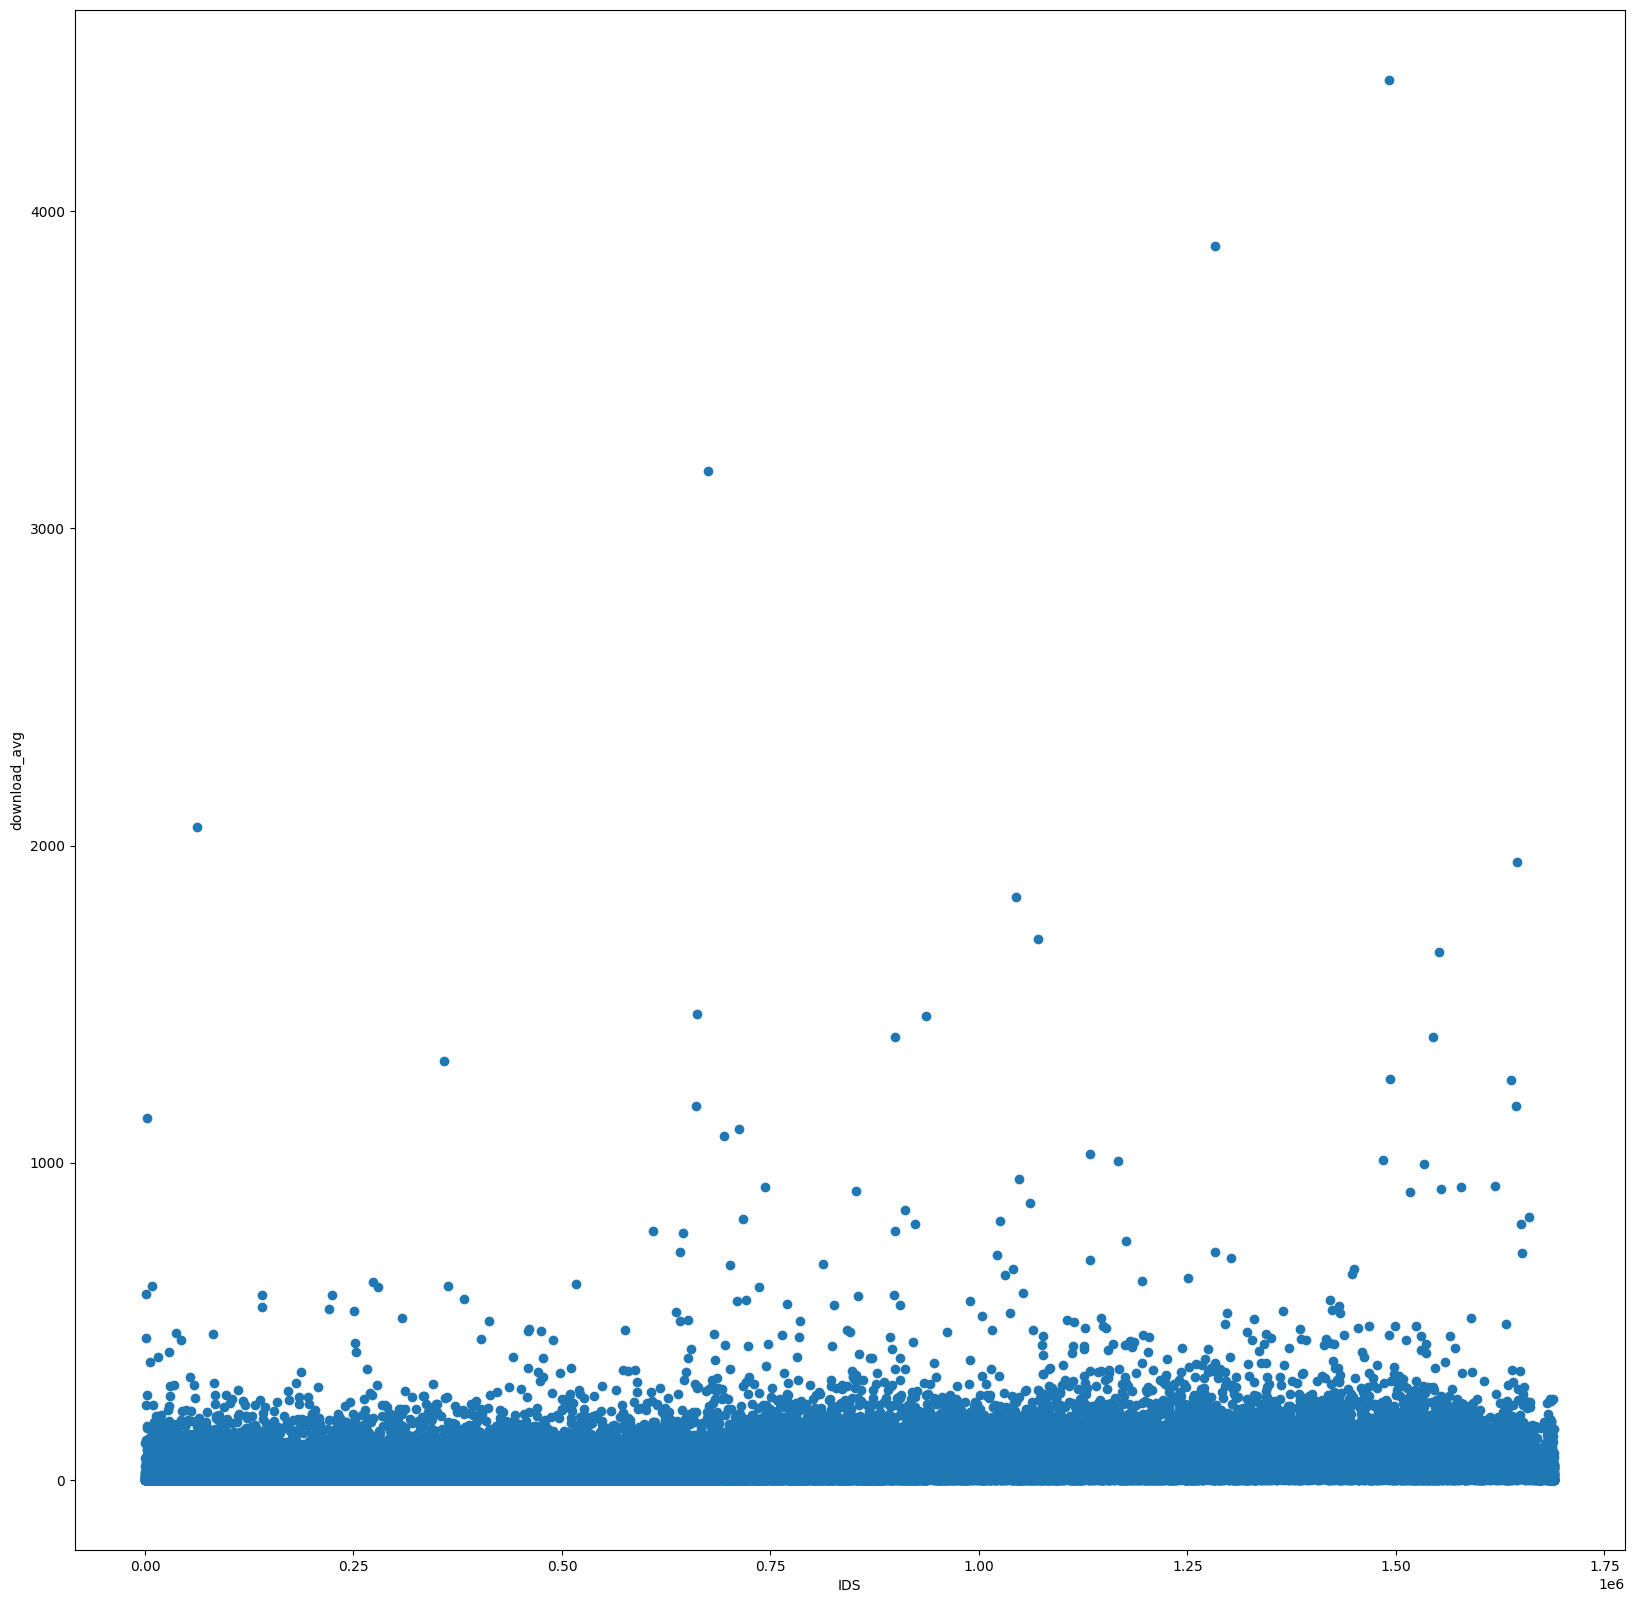

In [11]:
plt.figure(figsize=(20,20))
plt.scatter(df['id'], df['download_avg'])
plt.xlabel('IDS')
plt.ylabel('download_avg')

Using a histogram to visualize all the column data.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'is_tv_subscriber'}>,
        <Axes: title={'center': 'is_movie_package_subscriber'}>],
       [<Axes: title={'center': 'subscription_age'}>,
        <Axes: title={'center': 'bill_avg'}>,
        <Axes: title={'center': 'remaining_contract'}>],
       [<Axes: title={'center': 'service_failure_count'}>,
        <Axes: title={'center': 'download_avg'}>,
        <Axes: title={'center': 'upload_avg'}>],
       [<Axes: title={'center': 'download_over_limit'}>,
        <Axes: title={'center': 'churn'}>, <Axes: >]], dtype=object)

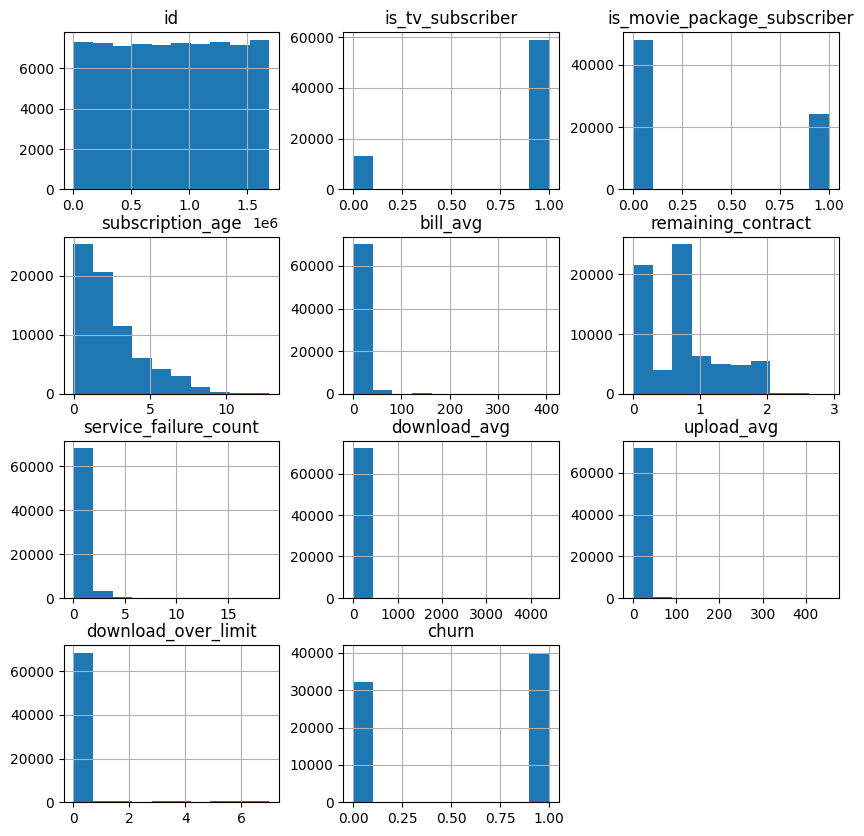

In [51]:
df.hist(figsize=(10,10))

Splitting the dataset to target and features. X=features, y=target.

In [13]:
X = df.drop(columns=['churn', 'id'])
y = df['churn']

import the KNeighborsClassifier class from the sklearn.neighbors module to create a KNN model to train the dataset.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

This line creates an instance of the KNeighborsClassifier class with a parameter of n_neighbors=3. Then splits the data into training and test sets using the train_test_split function. The function (train_test_split) takes the data and the target as arguments and returns four values: X_train, X_test, y_train, and y_test. The function uses 80% of the data for training and 20% for testing.

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
X.shape

(72274, 9)

In [17]:
y.shape

(72274,)

In [18]:
X_train.shape

(57819, 9)

In [19]:
y_train.shape

(57819,)

Fitting the model to the training data.

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Using the model to predict the test data.

In [21]:
knn.score(X_test, y_test)

0.8026288481494293

In [22]:
import numpy as np

Using a for loop to print the accuracy of the model for different values of k. The loop iterates over a range of values from 1 to 12 and prints the accuracy of the model for each value of k.

In [23]:
neighbors = np.arange(1,13)
train_acc = {}
test_acc = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)

    train_acc[neighbor] = knn.score(X_train, y_train)
    test_acc[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_acc, '\n', test_acc)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.9999827046472612, 2: 0.8857987858662377, 3: 0.8922499524377799, 4: 0.8641277088846226, 5: 0.8666009443262596, 6: 0.8525052318442035, 7: 0.8552724882823985, 8: 0.8443245299987894, 9: 0.8467112886767325, 10: 0.8379079541327246, 11: 0.8401736453414967, 12: 0.8338262508863868} 
 {1: 0.7789000345901073, 2: 0.7764095468695953, 3: 0.8026288481494293, 4: 0.7990314769975787, 5: 0.8079557246627465, 6: 0.8033898305084746, 7: 0.8079557246627465, 8: 0.8045658941542719, 9: 0.8095468695952958, 10: 0.8049117952265652, 11: 0.8103078519543411, 12: 0.8047042545831892}


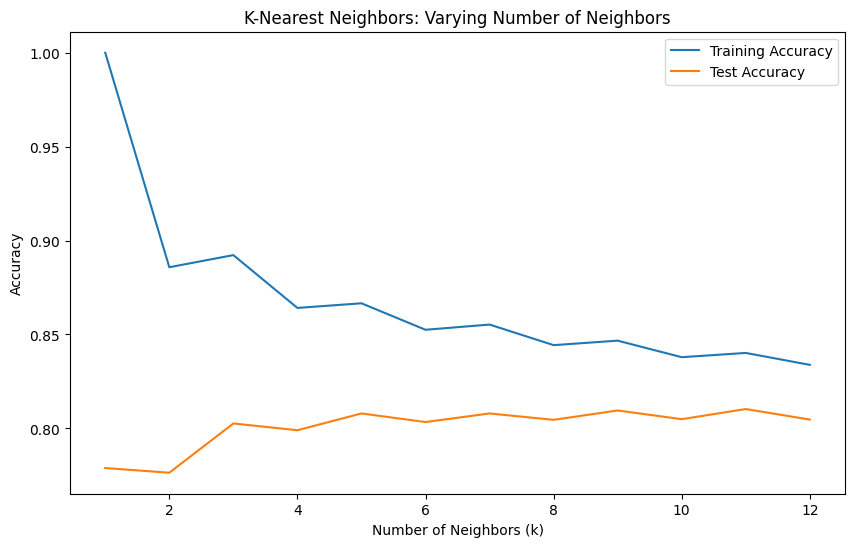

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, list(train_acc.values()), label='Training Accuracy')
plt.plot(neighbors, list(test_acc.values()), label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors: Varying Number of Neighbors')
plt.legend()
plt.show()


The ideal value of k is 3,for both training and testing data.

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = knn.predict(X_test)

In [73]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_c_matrix = confusion_matrix(y_test, y_pred)
knn_class_report = classification_report(y_test, y_pred)

In [74]:
print('Accuracy Score: ', knn_accuracy, '\n')
print('Confusion Matrix: \n', knn_c_matrix, '\n')
print('Classification Report: \n', knn_class_report)

Accuracy Score:  0.8026288481494293 

Confusion Matrix: 
 [[5225 1220]
 [1633 6377]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.81      0.79      6445
           1       0.84      0.80      0.82      8010

    accuracy                           0.80     14455
   macro avg       0.80      0.80      0.80     14455
weighted avg       0.80      0.80      0.80     14455



In [58]:
new_data = pd.DataFrame([{
    'is_tv_subscriber': 1,	
    'is_movie_package_subscriber': 0,	
    'subscription_age': 13	,
    'bill_avg': 14	,
    'remaining_contract': 0.2	,
    'service_failure_count': 0	,
    'download_avg':	8.4,
    'upload_avg': 2.3	,
    'download_over_limit': 0
},
{
    'is_tv_subscriber': 0,	
    'is_movie_package_subscriber': 1,	
    'subscription_age': 31	,
    'bill_avg': 4	,
    'remaining_contract': 6.5	,
    'service_failure_count': 5	,
    'download_avg':0.4,
    'upload_avg': 2.3	,
    'download_over_limit': 3.5
},
{    'is_tv_subscriber': 0,	
    'is_movie_package_subscriber': 0,	
    'subscription_age': 3	,
    'bill_avg': 4	,
    'remaining_contract': 1.5	,
    'service_failure_count': 2	,
    'download_avg':	8.4,
    'upload_avg': 2.3	,
    'download_over_limit': 2.9
},
{    'is_tv_subscriber': 1,	
    'is_movie_package_subscriber': 1,	
    'subscription_age': 1	,
    'bill_avg': 1	,
    'remaining_contract': 2	,
    'service_failure_count': 3	,
    'download_avg':	10.4,
    'upload_avg': 5.3	,
    'download_over_limit': 4.9
}
])

In [69]:
knn_predicted_churn = knn.predict(new_data)
print(f"Predicted preferred area: {knn_predicted_churn}")

Predicted preferred area: [0 1 1 1]


In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

In [62]:
y_clf_pred = clf.predict(X_test)
y_clf_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [63]:
accuracy_score(y_test,y_clf_pred)

0.9127637495676236

In [65]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'remaining_contract <= 0.718\ngini = 0.494\nsamples = 57819\nvalue = [25779, 32040]\nclass = Loyal'),
 Text(0.25, 0.7, 'remaining_contract <= 0.005\ngini = 0.342\nsamples = 38510\nvalue = [8419, 30091]\nclass = Loyal'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'subscription_age <= 1.915\ngini = 0.009\nsamples = 13133\nvalue = [58, 13075]\nclass = Loyal'),
 Text(0.0625, 0.3, 'upload_avg <= 10.95\ngini = 0.002\nsamples = 8877\nvalue = [9, 8868]\nclass = Loyal'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'subscription_age <= 1.945\ngini = 0.023\nsamples = 4256\nvalue = [49, 4207]\nclass = Loyal'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'remaining_contract <= 0.713\ngini = 0.442\nsamples = 25377\nvalue = [8361, 17016]\nclass = Loyal'),
 Text(0.3125, 0.3, 'download_avg <= 0.05\ngini = 0.262\nsamples = 8163\nvalue = [6896, 1267]\nclass = Churned'),
 Text(0.28125, 

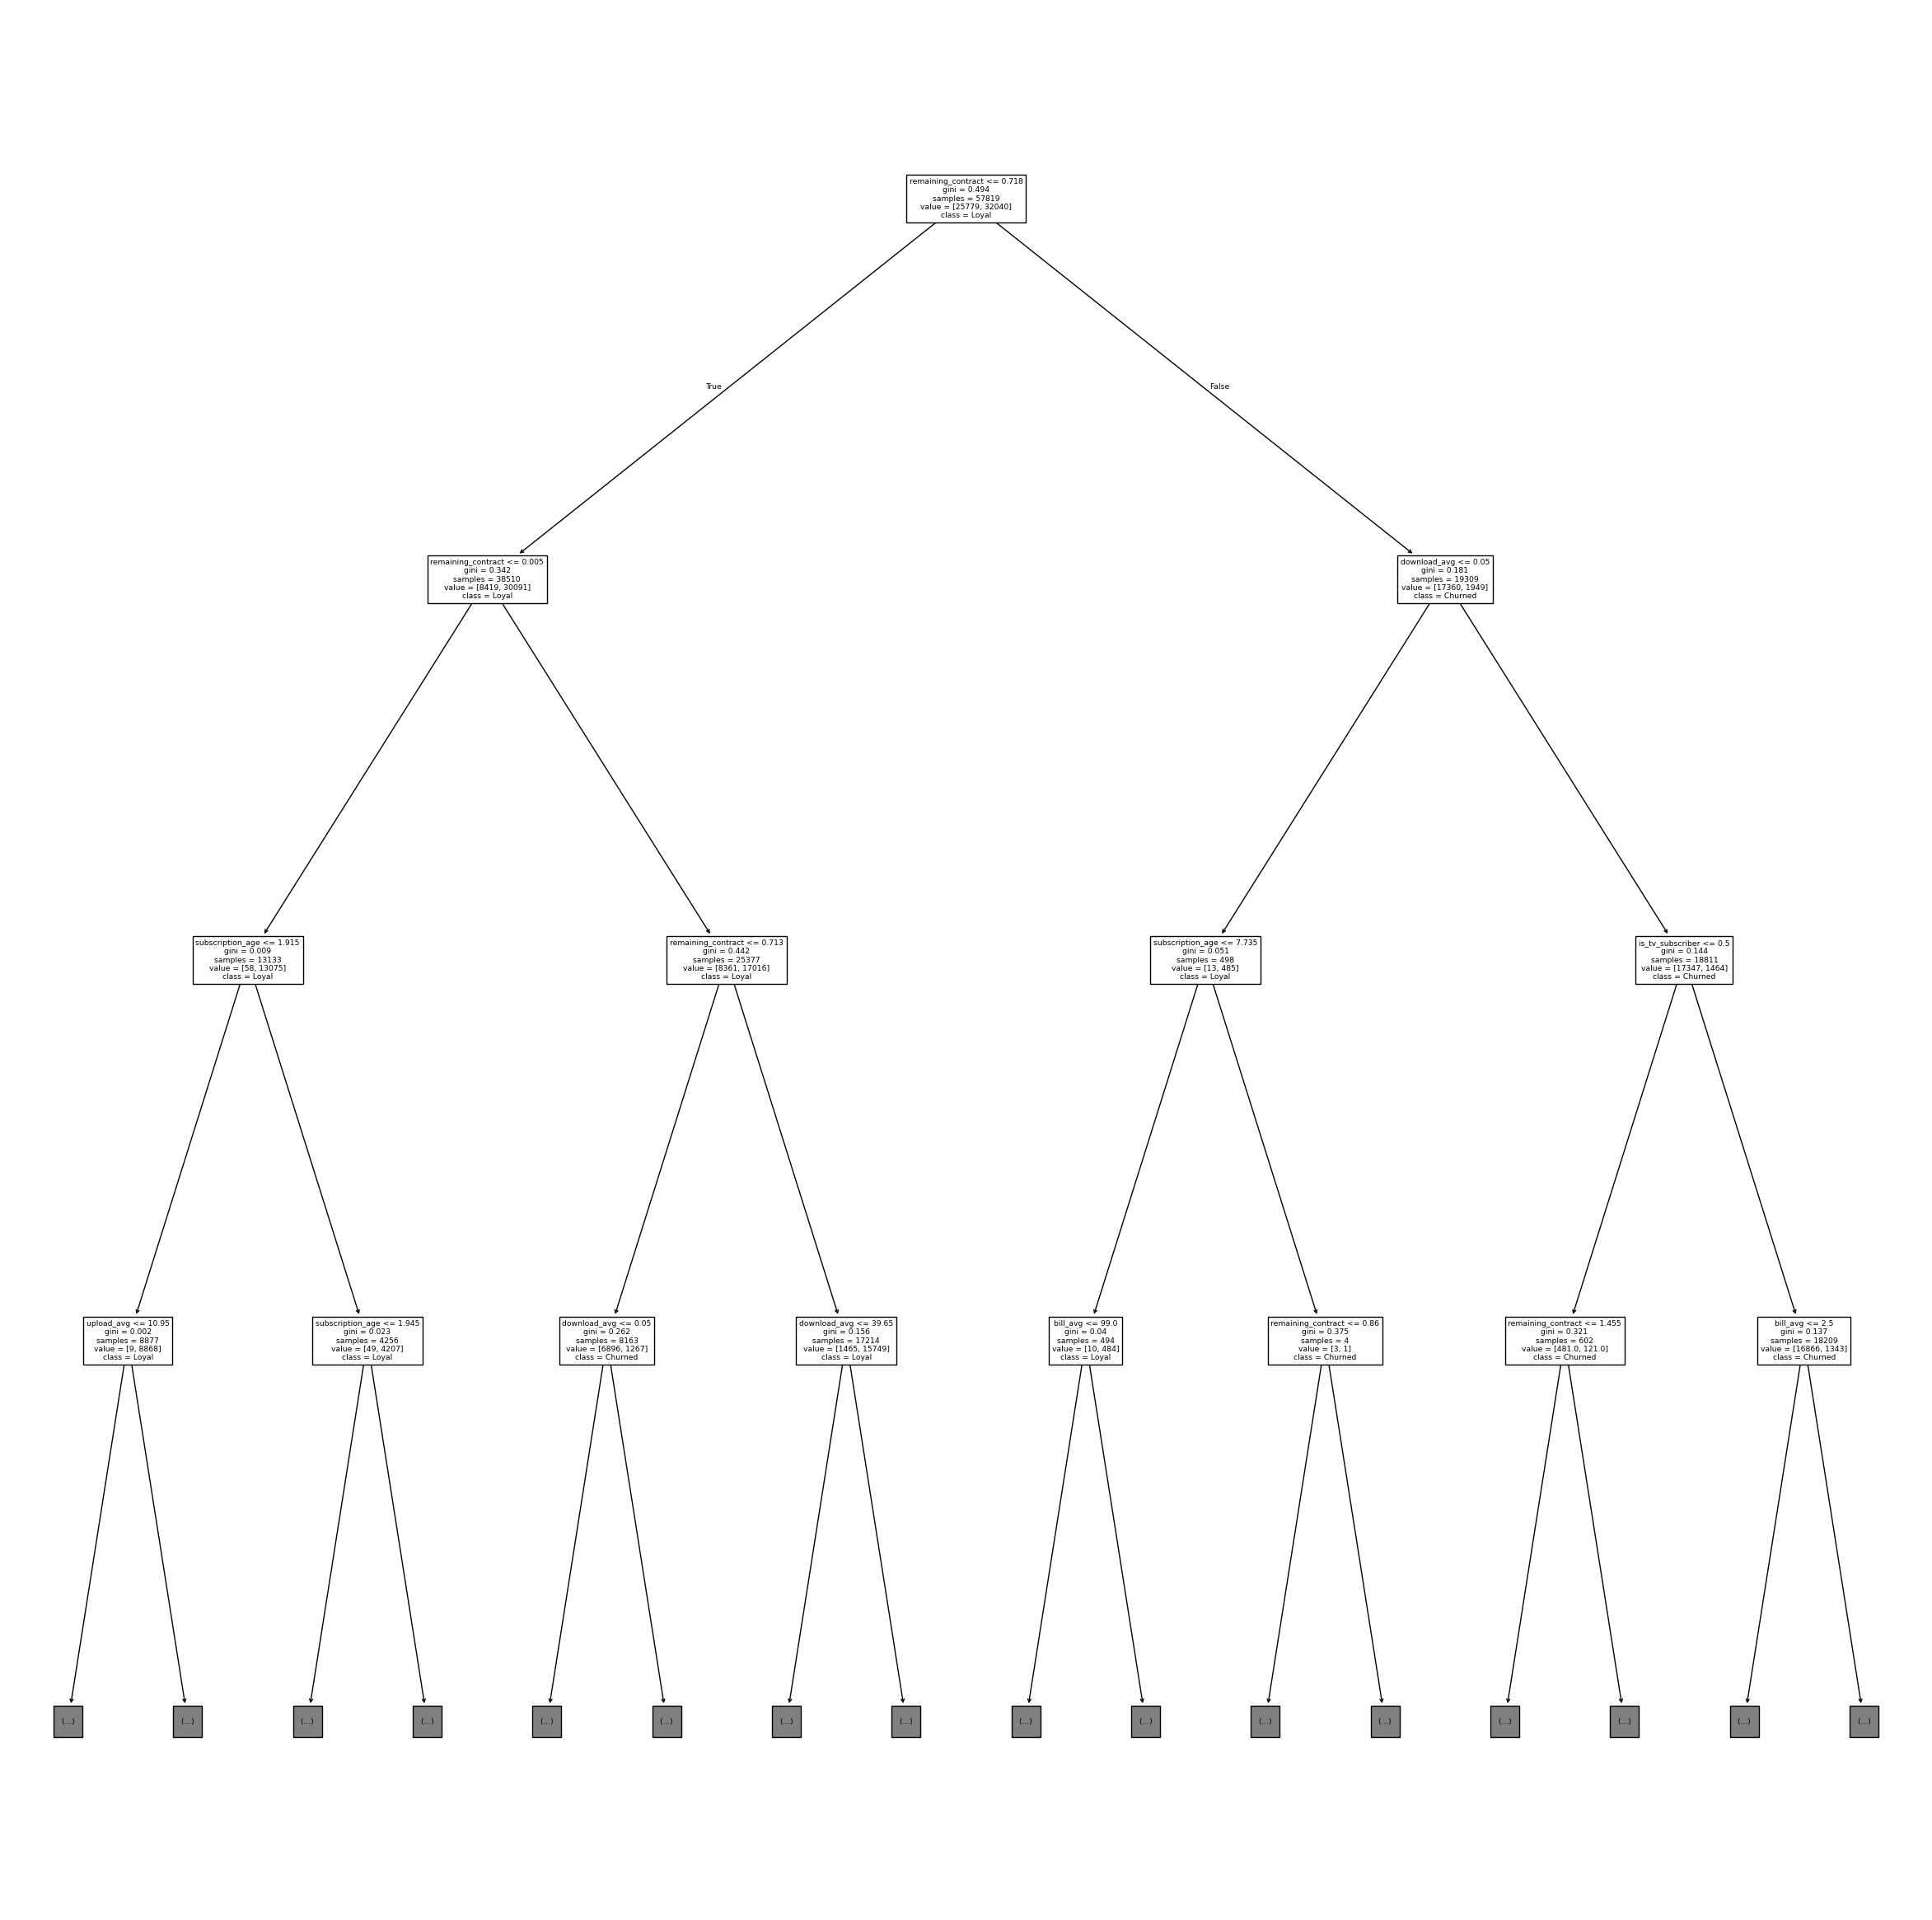

In [67]:
plt.figure(figsize=(30,30))
plot_tree(clf, max_depth=3, 
          feature_names=list(X.columns),
          class_names=['Churned','Loyal'])

In [71]:
dtree_predict_churn = clf.predict(new_data)
dtree_predict_churn

array([0, 1, 1, 1], dtype=int64)

In [83]:
print('Decision Tree Accuracy Score \n', accuracy_score(y_test, y_clf_pred), '\n')
print('Decision Tree Classification Report \n', classification_report(y_test, y_clf_pred), '\n')
print('Decision Tree Confusion Matrix \n', confusion_matrix(y_test, y_clf_pred), '\n')

Decision Tree Accuracy Score 
 0.9127637495676236 

Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      6445
           1       0.92      0.92      0.92      8010

    accuracy                           0.91     14455
   macro avg       0.91      0.91      0.91     14455
weighted avg       0.91      0.91      0.91     14455
 

Decision Tree Confusion Matrix 
 [[5828  617]
 [ 644 7366]] 



## Random Forest Classification

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
forest_classifier = RandomForestClassifier(random_state=42)

In [86]:
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
forest_classifier.feature_importances_

array([0.02836556, 0.03208725, 0.07796428, 0.06696908, 0.53244026,
       0.00698563, 0.13852872, 0.11295967, 0.00369954])

In [89]:
X_train.columns

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'remaining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit'],
      dtype='object')

forest_classifier.feature_importances_ shows that 'remaining_contract' is the most important feature in predicting customer churn.

In [90]:
forest_classifier.score(X_train, y_train)

0.9999481139417838

In [100]:
forest_classifier.predict(new_data)

array([0, 0, 0, 1], dtype=int64)

In [91]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [92]:
hist_classifier = HistGradientBoostingClassifier(random_state=42)

In [93]:
hist_classifier.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [94]:
y_hist_pred = hist_classifier.predict(X_test)

In [96]:
hist_classifier.score(X_train, y_train)

0.946436292568187

In [98]:
print('Hist Accuracy Score: \n', accuracy_score(y_test, y_hist_pred))
print('Hist Classification Matrix: \n', classification_report(y_test, y_hist_pred))
print('Hist Confusion Matrix: \n', confusion_matrix(y_test, y_clf_pred))

Hist Accuracy Score: 
 0.9414735385679696
Hist Classification Matrix: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      6445
           1       0.96      0.94      0.95      8010

    accuracy                           0.94     14455
   macro avg       0.94      0.94      0.94     14455
weighted avg       0.94      0.94      0.94     14455

Hist Confusion Matrix: 
 [[5828  617]
 [ 644 7366]]


In [99]:
hist_classifier.predict(new_data)

array([0, 0, 1, 1], dtype=int64)